# GeoDataFrame
- estructura de datos espaciales
## Datos Espaciales
- puntos
- lineas
- poligonos
## Serie
- arreglo unidimensional
## GeoPandas
- Biblioteca para hacer operaciones espaciales
- calcular distancias, areas, perimetros, *bufer*, distancia que hay desde un elemento de un poligono
- crs(sitema de referencia de coordenadas),


In [1]:
# Unir GeoDataFrames

import geopandas as gpd

las columnas se clasifican en *alfanumericas* o de *atributos* y de geometría
- si tenemos más de un campo geométrico es necesario especificar cual se va a usar
Contextily, biblioteca para hacer mapas básicos(báse)

In [2]:
gdf_localidades=gpd.read_file("/content/drive/MyDrive/POO/localidades.json")
gdf_localidades.to_crs(epsg=9377,inplace=True)
gdf_localidades["area(km^2)"]=gdf_localidades.area/1000000
gdf_localidades["Centroide"]=gdf_localidades.centroid
gdf_localidades

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,area(km^2),Centroide
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650)
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988)
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661)
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256)
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677)
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938)
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463)
7,88,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915)
8,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429)
9,90,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600)


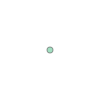

In [3]:
from shapely.geometry import Point

universidad=Point(-74.06593766123683, 4.628064133904541)
universidad

In [4]:
universidad=gpd.GeoSeries(universidad, crs=4326)
universidad

0    POINT (-74.06594 4.62806)
dtype: geometry

In [5]:
universidad=universidad.to_crs(epsg=9377)
universidad

0    POINT (4881812.523 2069484.843)
dtype: geometry

In [6]:
gdf_localidades["distancia_u"]=[float(universidad.distance(centroid)/1000) for centroid in gdf_localidades.Centroide]
gdf_localidades["distancia_u"]

<ipython-input-6-db1f5f1ba436>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gdf_localidades["distancia_u"]=[float(universidad.distance(centroid)/1000) for centroid in gdf_localidades.Centroide]


0      5.966996
1      9.743891
2      8.601403
3      3.542512
4      4.663623
5      2.633402
6      5.227195
7      3.360995
8     68.722356
9     13.271718
10     3.716420
11     5.005543
12     8.765304
13    27.654482
14    19.296301
15    14.261165
16     9.620877
17     9.919647
18     9.625132
19    14.975272
Name: distancia_u, dtype: float64

<Axes: >

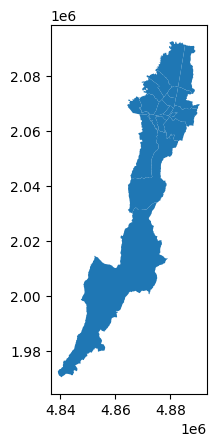

In [7]:
gdf_localidades.plot()

In [8]:
gdf_localidades

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,area(km^2),Centroide,distancia_u
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650),5.966996
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988),9.743891
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661),8.601403
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256),3.542512
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677),4.663623
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938),2.633402
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463),5.227195
7,88,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915),3.360995
8,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429),68.722356
9,90,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600),13.271718


<Axes: >

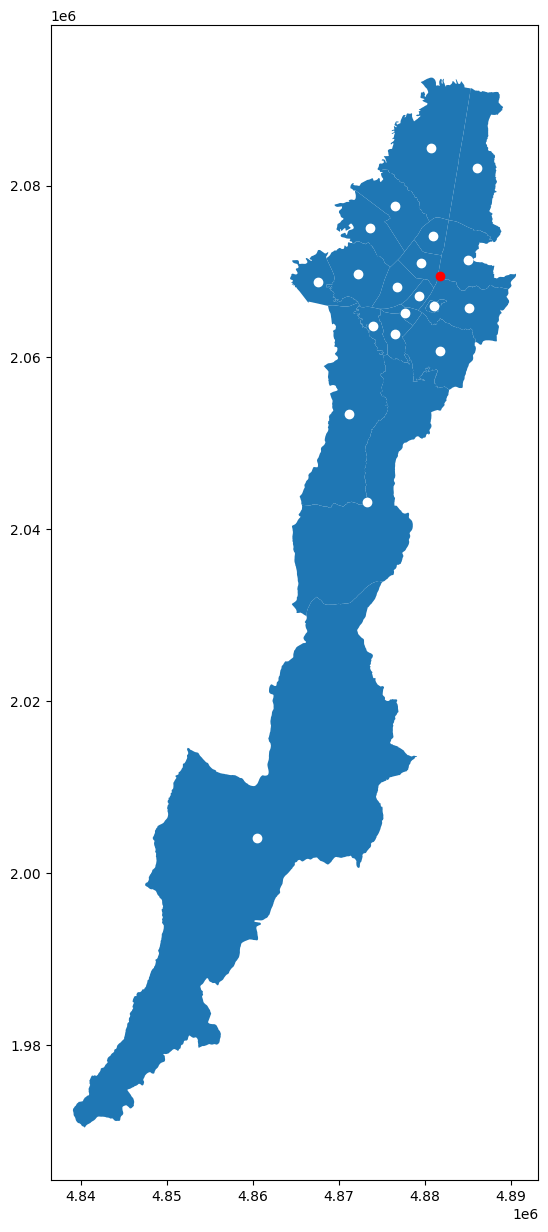

In [9]:
mapa=gdf_localidades.plot(figsize=(10,15))
gdf_localidades["Centroide"].plot(ax=mapa, color="white")
universidad.plot(ax=mapa, color="red")

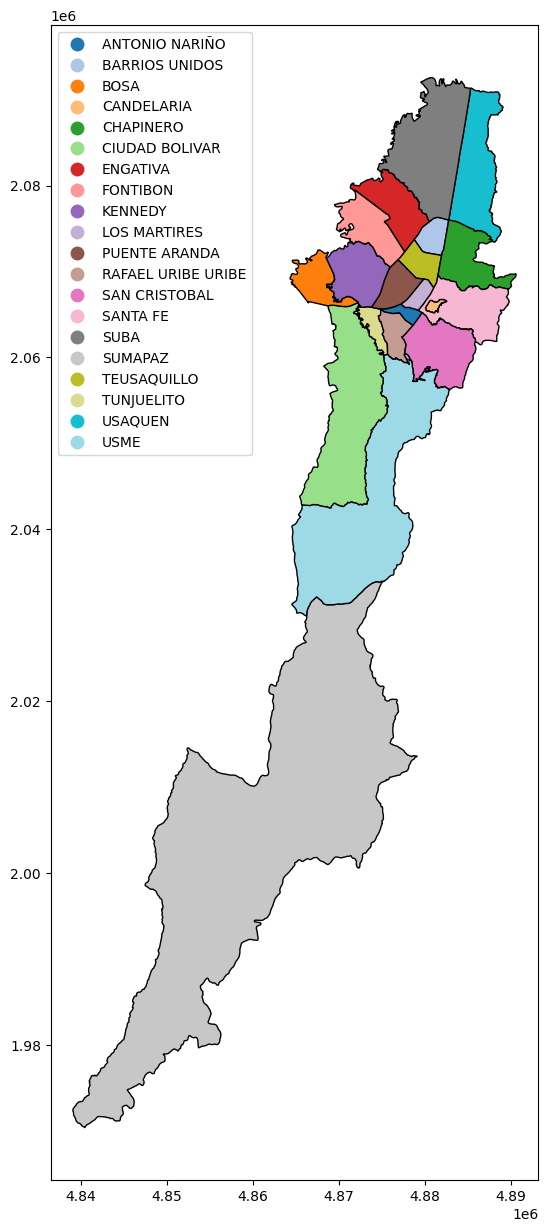

In [10]:
mapa2=gdf_localidades.plot(
    column="LocNombre",
    figsize=(15,15),
    edgecolor='black',
    cmap='tab20',
    legend=True,
    legend_kwds={
        'loc':'upper left'
    }
)

In [11]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 23.0 MB/s eta 0:00:00


In [12]:
import contextily as ctx

# Agregar datos
Join unir GeoDataFrames usando datos en común
- ir a plataforma de datos abiertos de Bogotá
- IDECA (información geográfica)
- Plataforma dedatos abiertos del distrito (informacion con atributos)

In [13]:
import pandas as pd
poblacion=pd.read_csv("/content/drive/MyDrive/POO/osb_demografia-poblacion-localidad.csv", encoding='latin-1', delimiter=";")
poblacion.head()

,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
0,2005,1,Usaquén,Hombres,0,00 a 04,2909
1,2005,1,Usaquén,Hombres,1,00 a 04,2954
2,2005,1,Usaquén,Hombres,2,00 a 04,2919
3,2005,1,Usaquén,Hombres,3,00 a 04,2989
4,2005,1,Usaquén,Hombres,4,00 a 04,3079


ETL (Extract Transform Load)
- extraer, transformar y cargar

In [14]:
# Filtrar
poblacion2024=poblacion[poblacion['Año']==2024]
poblacion2024.head()

,Año,Cod_Loc,Localidad,Sexo,Edad,Grupo_Edad,Población
76760,2024,1,Usaquén,Hombres,0,00 a 04,3128
76761,2024,1,Usaquén,Hombres,1,00 a 04,3147
76762,2024,1,Usaquén,Hombres,2,00 a 04,3139
76763,2024,1,Usaquén,Hombres,3,00 a 04,3106
76764,2024,1,Usaquén,Hombres,4,00 a 04,3037


In [15]:
# Agrupar
grupos=poblacion2024.groupby("Localidad")
grupos

In [16]:
suma_poblacion=grupos["Población"].sum()
suma_poblacion

Localidad
Antonio Nariño          84979
Barrios Unidos         156268
Bogotá                7929539
Bosa                   733740
Chapinero              182103
Ciudad Bolívar         666809
Engativá               819441
Fontibón               408155
Kennedy               1037929
La Candelaria           18675
Los Mártires            83001
Puente Aranda          258034
Rafael Uribe Uribe     391588
San Cristóbal          409106
Santa Fe               107906
Suba                  1313453
Sumapaz                  3926
Teusaquillo            165438
Tunjuelito             184492
Usaquén                594611
Usme                   414995
Name: Población, dtype: int64

In [17]:
# Convertir seria a dataframe para unirlo a otro

df_poblacion=suma_poblacion.reset_index()
df_poblacion

,Localidad,Población
0,Antonio Nariño,84979
1,Barrios Unidos,156268
2,Bogotá,7929539
3,Bosa,733740
4,Chapinero,182103
5,Ciudad Bolívar,666809
6,Engativá,819441
7,Fontibón,408155
8,Kennedy,1037929
9,La Candelaria,18675


In [18]:
# Para unir dataframes tienen que coinsidir los carácteres relacionados a los mismos
# str.upper transforma una cadena de texto (string) a mayúscula

df_poblacion['Localidad']=df_poblacion['Localidad'].str.upper()
df_poblacion

,Localidad,Población
0,ANTONIO NARIÑO,84979
1,BARRIOS UNIDOS,156268
2,BOGOTÁ,7929539
3,BOSA,733740
4,CHAPINERO,182103
5,CIUDAD BOLÍVAR,666809
6,ENGATIVÁ,819441
7,FONTIBÓN,408155
8,KENNEDY,1037929
9,LA CANDELARIA,18675


In [24]:
# para quitar la tildes de el gdf es necesario crear una función que lo haga

def replace_accents(input_str):
  replacements ={
      'Á':'A',
      'É':'E',
      'Í':'I',
      'Ó':'O',
      'Ú':'U',
  }
  for accented_char, unaccented_char in replacements.items():
    input_str = input_str.replace(accented_char, unaccented_char)
  return input_str

df_poblacion['Localidad']= df_poblacion['Localidad'].apply(replace_accents)
df_poblacion

,Localidad,Población
0,ANTONIO NARIÑO,84979
1,BARRIOS UNIDOS,156268
2,BOGOTA,7929539
3,BOSA,733740
4,CHAPINERO,182103
5,CIUDAD BOLIVAR,666809
6,ENGATIVA,819441
7,FONTIBON,408155
8,KENNEDY,1037929
9,CANDELARIA,18675


In [25]:
##

filas=df_poblacion['Localidad']=='LA CANDELARIA'
columna='Localidad'
df_poblacion.loc[filas,columna]='CANDELARIA'
df_poblacion

,Localidad,Población
0,ANTONIO NARIÑO,84979
1,BARRIOS UNIDOS,156268
2,BOGOTA,7929539
3,BOSA,733740
4,CHAPINERO,182103
5,CIUDAD BOLIVAR,666809
6,ENGATIVA,819441
7,FONTIBON,408155
8,KENNEDY,1037929
9,CANDELARIA,18675


In [28]:
marged_df=gdf_localidades.merge(df_poblacion,left_on='LocNombre', right_on='Localidad')
marged_df

,OBJECTID,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,area(km^2),Centroide,distancia_u,Localidad,Población
0,81,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650),5.966996,ANTONIO NARIÑO,84979
1,82,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988),9.743891,TUNJUELITO,184492
2,83,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661),8.601403,RAFAEL URIBE URIBE,391588
3,84,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256),3.542512,CANDELARIA,18675
4,85,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677),4.663623,BARRIOS UNIDOS,156268
5,86,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938),2.633402,TEUSAQUILLO,165438
6,87,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463),5.227195,PUENTE ARANDA,258034
7,88,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915),3.360995,LOS MARTIRES,83001
8,89,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429),68.722356,SUMAPAZ,3926
9,90,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600),13.271718,USAQUEN,594611


In [29]:
gdf_Wpoblacion = marged_df.drop('LocNombre', axis=1)
gdf_Wpoblacion

,OBJECTID,LocAAdmini,LocArea,LocCodigo,SHAPE_Length,SHAPE_Area,geometry,area(km^2),Centroide,distancia_u,Localidad,Población
0,81,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((4874618.874 2065659.921, 4874795.124...",4.869648,POINT (4877713.442 2065148.650),5.966996,ANTONIO NARIÑO,84979
1,82,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((4873841.563 2065830.436, 4874519.655...",9.891070,POINT (4874035.106 2063614.988),9.743891,TUNJUELITO,184492
2,83,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((4874920.785 2065569.457, 4874949.616...",13.806132,POINT (4876542.907 2062686.661),8.601403,RAFAEL URIBE URIBE,391588
3,84,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((4881778.345 2066733.979, 4881778.829...",2.056021,POINT (4881127.188 2066009.256),3.542512,CANDELARIA,18675
4,85,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((4882785.952 2075978.421, 4882199.321...",11.879074,POINT (4880975.173 2074072.677),4.663623,BARRIOS UNIDOS,156268
5,86,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((4878738.750 2073689.146, 4878782.741...",14.164212,POINT (4879615.656 2070936.938),2.633402,TEUSAQUILLO,165438
6,87,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((4876007.832 2070526.798, 4876369.768...",17.276153,POINT (4876749.147 2068186.463),5.227195,PUENTE ARANDA,258034
7,88,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((4881046.225 2068088.367, 4881014.702...",6.500764,POINT (4879368.270 2067177.915),3.360995,LOS MARTIRES,83001
8,89,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((4866233.277 2029900.424, 4866233.278...",779.469471,POINT (4860516.436 2004145.429),68.722356,SUMAPAZ,3926
9,90,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((4887892.280 2073511.921, 4887891.792...",65.065697,POINT (4886050.882 2082061.600),13.271718,USAQUEN,594611


Taller
- crear un mapa coropletico de bogotá y su población
poner mapa báse

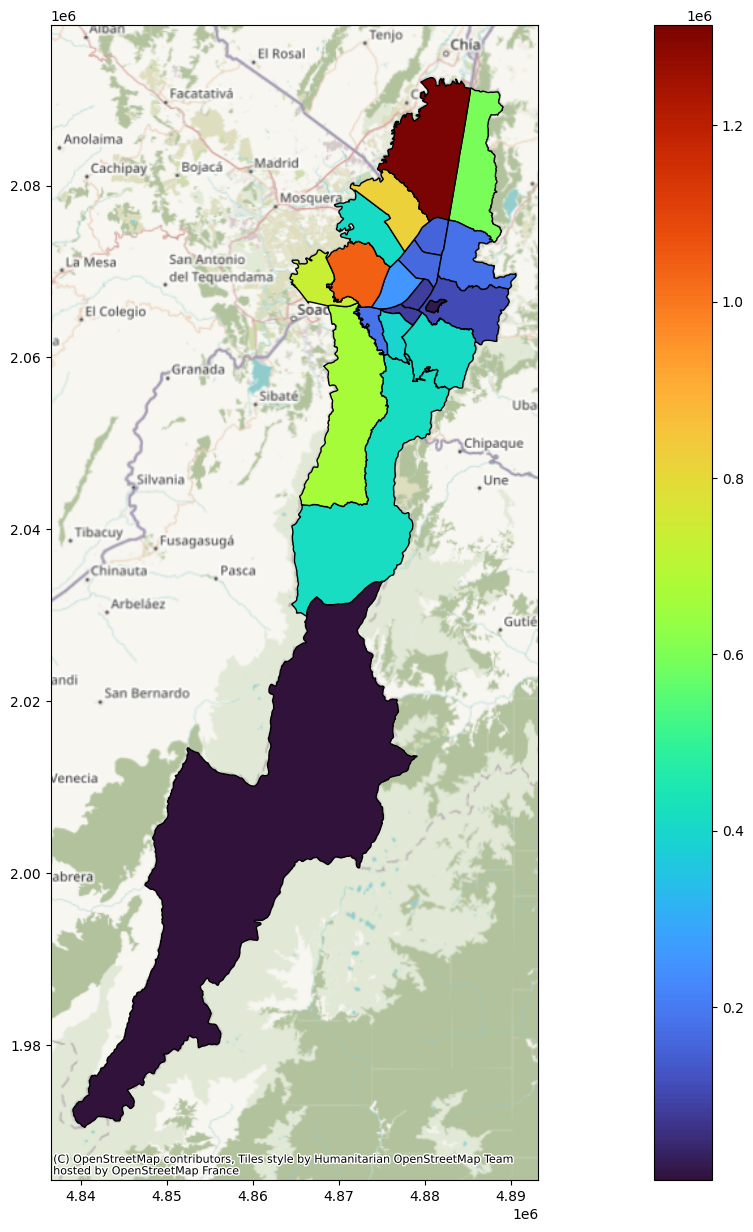

In [37]:
mapaC = gdf_Wpoblacion.plot(
      column="Población",
      figsize=(30,15),
      edgecolor='black',
      cmap='turbo',
      legend=True,
)
ctx.add_basemap(mapaC, crs=gdf_Wpoblacion.crs.to_string())